In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv("/Users/ritkumar17/Desktop/R&D_Project/data_science_interview/data_science_interview/Bank Customer Historic Data.csv")

In [3]:
data_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data_df["Exited"].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

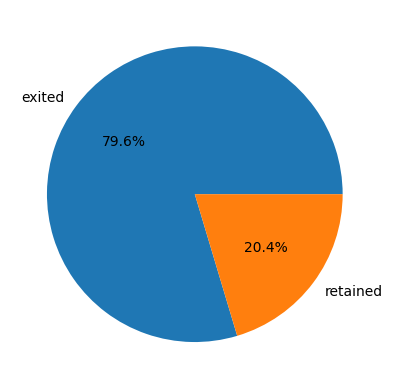

In [5]:
labels = ["exited", "retained"]

sizes = data_df["Exited"].astype(float).value_counts(normalize=True).to_list()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [6]:
numeric_column = [x for x in data_df.columns if pd.to_numeric(data_df[x], errors="coerce").notnull().all()]

In [7]:
numeric_column

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [8]:
data_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data_df.drop(columns=["RowNumber","CustomerId",  "Surname"], inplace=True, axis=1)

In [10]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
numeric_column= [x for x in data_df.columns if pd.to_numeric(data_df[x], errors="coerce").notnull().all()]

In [12]:
numeric_column

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [13]:
category_column= ["Tenure","NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]

In [14]:
continue_column =["CreditScore","Balance",  "EstimatedSalary","Age"]

In [15]:
data_df[continue_column]

,CreditScore,Balance,EstimatedSalary,Age
0,619,0.00,101348.88,42
1,608,83807.86,112542.58,41
2,502,159660.80,113931.57,42
3,699,0.00,93826.63,39
4,850,125510.82,79084.10,43
...,...,...,...,...
9995,771,0.00,96270.64,39
9996,516,57369.61,101699.77,35
9997,709,0.00,42085.58,36
9998,772,75075.31,92888.52,42


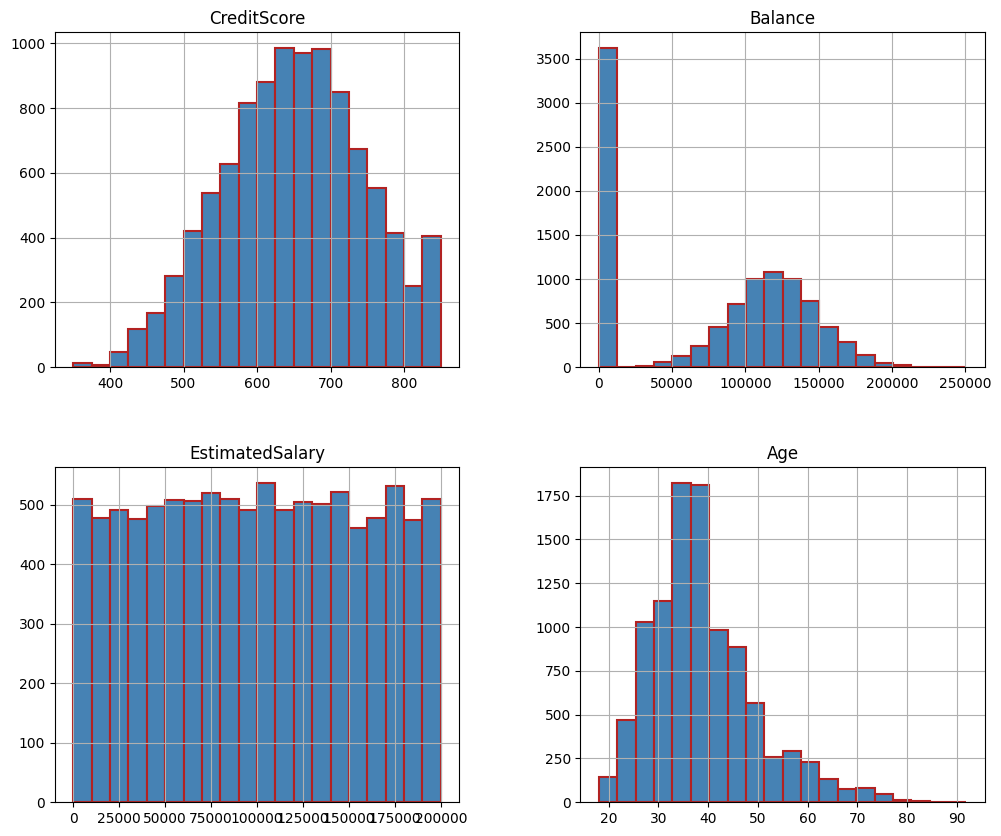

In [16]:
data_df[continue_column].hist(figsize=(12,10), bins =20, layout=(2,2), color="steelblue", edgecolor="firebrick", linewidth=1.5)
plt.show()

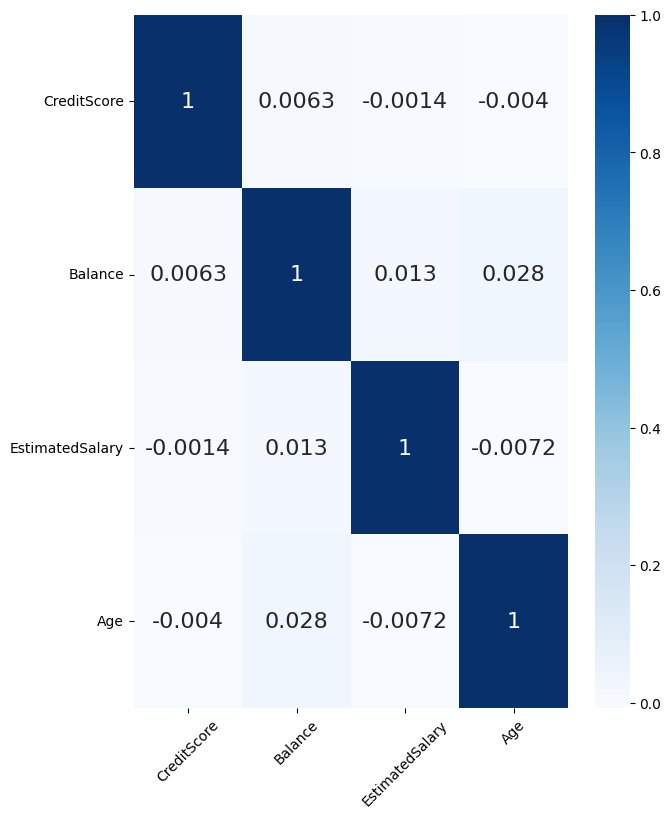

In [17]:
fig, ax = plt.subplots(figsize=(7,9))
sns.heatmap(data_df[continue_column].corr(), cmap="Blues", annot=True, annot_kws={"fontsize" :16}, ax=ax)

ax.tick_params(axis="x", rotation = 45)
ax.tick_params(axis="y", rotation = 360)

In [18]:
df_churn = data_df[data_df["Exited"]==0]
df_retain = data_df[data_df["Exited"]==1]

/var/folders/00/rndss5vd6h9cdr24fwvnz6kw0000gp/T/ipykernel_41412/2640631029.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="CreditScore", y="Exited", data=data_df,
/var/folders/00/rndss5vd6h9cdr24fwvnz6kw0000gp/T/ipykernel_41412/2640631029.py:33: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxenplot(x="CreditScore", y="Exited", data=data_df,
/var/folders/00/rndss5vd6h9cdr24fwvnz6kw0000gp/T/ipykernel_41412/2640631029.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['Retained', 'Churned'])


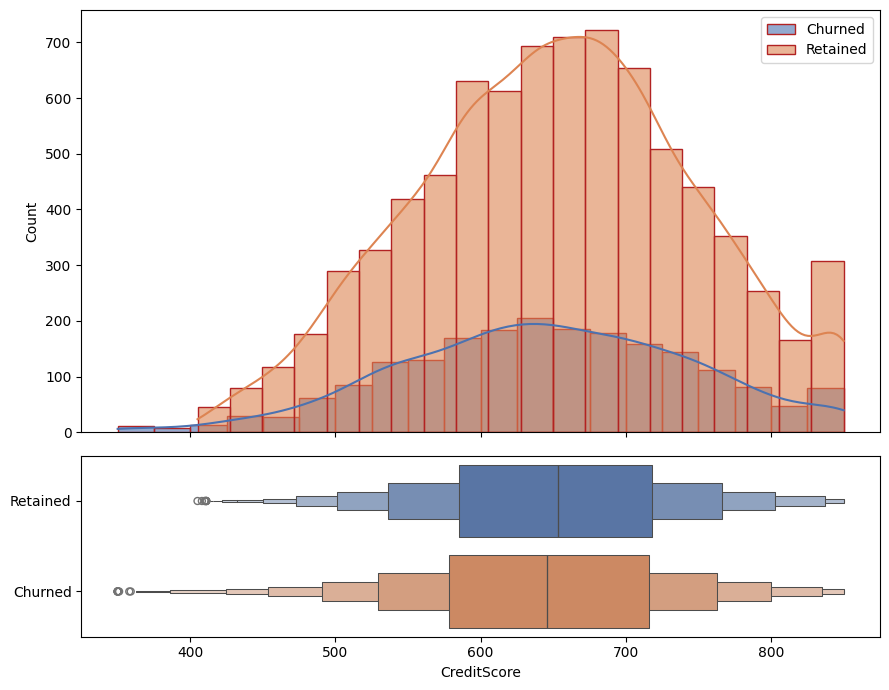

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure categorical type
data_df["Exited"] = data_df["Exited"].astype("category")

# Split into churned and retained
df_churn = data_df[data_df["Exited"] == 1]
df_retain = data_df[data_df["Exited"] == 0]

# Labels & colors
labels = ["Churned", "Retained"]
colors = sns.color_palette("deep")

# Subplots: histogram + boxplot
fig, (ax1, ax2) = plt.subplots(
    2,
    figsize=(9, 7),
    sharex=True,
    gridspec_kw={"height_ratios": (.7, .3)}
)

# Plot histogram for each group
for df, color, label in zip([df_churn, df_retain], colors, labels):
    sns.histplot(df, x="CreditScore", bins=20,alpha=0.6, kde=True,
                 edgecolor="firebrick", ax=ax1,
                 color=color, label=label)

# Add legend
ax1.legend()

# Boxplot at the bottom
sns.boxenplot(x="CreditScore", y="Exited", data=data_df,
              palette=colors, ax=ax2)

ax2.set_ylabel("")
ax2.set_yticklabels(['Retained', 'Churned'])

plt.tight_layout()


/var/folders/00/rndss5vd6h9cdr24fwvnz6kw0000gp/T/ipykernel_41412/3035877109.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x="Geography", hue='Exited', data= data_df, palette=sns.color_palette("deep"), ax=ax1)
/var/folders/00/rndss5vd6h9cdr24fwvnz6kw0000gp/T/ipykernel_41412/3035877109.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Geography", y="Exited",data=data_df, palette=sns.color_palette("deep"), ax=ax2)
/var/folders/00/rndss5vd6h9cdr24fwvnz6kw0000gp/T/ipykernel_41412/3035877109.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x="Geography", y="Exited",data=data_df, palette=sns.color_palette("deep"), ax=ax2)


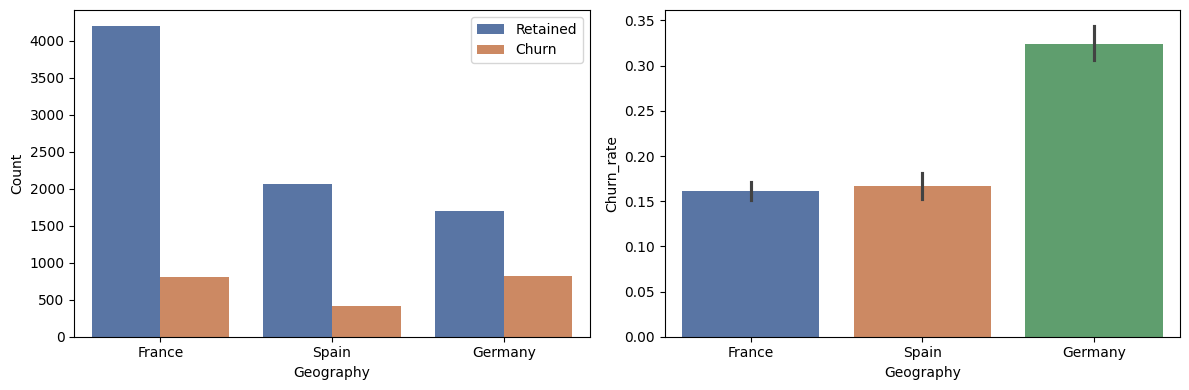

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x="Geography", hue='Exited', data= data_df, palette=sns.color_palette("deep"), ax=ax1)
ax1.set_ylabel("Count")
ax1.legend(labels=["Retained", "Churn"])

sns.barplot(x="Geography", y="Exited",data=data_df, palette=sns.color_palette("deep"), ax=ax2)
ax2.set_ylabel("Churn_rate")
ax2.invert_yaxis()
plt.tight_layout()
plt.show()

In [21]:
data_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
#1) Find the number of female in france

In [23]:
data_df["Gender"] = data_df["Gender"].map({"Male":0, "Female" :1})

In [24]:
data_df= pd.get_dummies(data_df, columns=["Geography"], drop_first=True, dtype=int)

In [25]:
data_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,1,0


In [26]:
data_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,1,0


In [ ]:
X = data_df.drop(columns=["Exited"])
y = data_df["Exited"]

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, x_test, Y_train, y_test = train_test_split(X, y , random_state=12, stratify=y)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR = LogisticRegression()

In [33]:
LR.fit(X_train,Y_train )

/Users/ritkumar17/Desktop/R&D_Project/data_science_interview/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
confusion_matrix(y_test, LR.predict(x_test) )

array([[1947,   44],
       [ 473,   36]])

In [ ]:
print(classification_report(y_test, LR.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1991
           1       0.45      0.07      0.12       509

    accuracy                           0.79      2500
   macro avg       0.63      0.52      0.50      2500
weighted avg       0.73      0.79      0.73      2500



In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
sm = SMOTE(random_state=15)

In [42]:
X_train_res , Y_train_res = sm.fit_resample(X_train, Y_train )

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,686,0,41,7,102749.720000,1,0,1,194913.860000,0,1
1,749,0,42,9,222267.630000,1,0,0,101108.850000,0,1
2,777,1,35,3,0.000000,2,1,1,17257.720000,0,1
3,650,0,60,8,0.000000,2,1,1,102925.760000,0,0
4,696,1,27,2,96129.320000,2,1,1,5983.700000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11939,584,0,51,4,121440.175117,1,1,0,47629.251897,0,0
11940,577,1,41,4,112564.104789,1,0,0,190973.327545,0,0
11941,460,0,36,1,135420.535617,1,0,0,149826.958940,1,0
11942,543,0,48,4,121379.937297,1,0,0,71924.037898,0,0


In [ ]:
lr = LogisticRegression(random_state=22)
lr.fit(X_train_res, Y_train_res)

/Users/ritkumar17/Desktop/R&D_Project/data_science_interview/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,22
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
print(classification_report(lr.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1595
           1       0.61      0.34      0.44       905

    accuracy                           0.68      2500
   macro avg       0.66      0.61      0.61      2500
weighted avg       0.67      0.68      0.66      2500



In [48]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [49]:
RFC = RandomForestClassifier()

In [50]:
RFC.fit(X_train_res, Y_train_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
print(classification_report(y_test, RFC.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1991
           1       0.51      0.60      0.55       509

    accuracy                           0.80      2500
   macro avg       0.70      0.73      0.71      2500
weighted avg       0.81      0.80      0.81      2500



In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [62]:
param_dist = {"n_estimators": randint(10, 100), 'max_depth' : randint(1,20), "min_samples_split":randint(2,20),
              "max_features": ['auto', 'sqrt', 'log2']}

In [63]:
ranom_cv = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=22), param_distributions=param_dist,n_iter=50, cv=5, scoring='recall', random_state=22)

In [64]:
ranom_cv.fit(X_train_res, Y_train_res)

/Users/ritkumar17/Desktop/R&D_Project/data_science_interview/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ritkumar17/Desktop/R&D_Project/data_science_interview/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ritkumar17/Desktop/R&D_Project/data_science_interview/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/Users/ritkumar17/

,estimator,RandomForestC...ndom_state=22)
,param_distributions,"{'max_depth': <scipy.stats....t 0x12de91f10>, 'max_features': ['auto', 'sqrt', ...], 'min_samples_split': <scipy.stats....t 0x12de93cb0>, 'n_estimators': <scipy.stats....t 0x12de93620>}"
,n_iter,50
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,22
,error_score,nan


In [65]:
ranom_cv.best_score_

np.float64(0.84240939705501)

In [66]:
ranom_cv.best_params_

{'max_depth': 19,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 72}

In [67]:
ranom_cv.best_estimator_.score(x_test, y_test)

0.7988

In [68]:
model= ranom_cv.best_estimator_

In [72]:
imprt = model.feature_importances_

In [70]:
feature = X_train.columns

In [71]:
feature

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [73]:
fest = pd.Series(imprt, index=feature).sort_values(ascending=True)

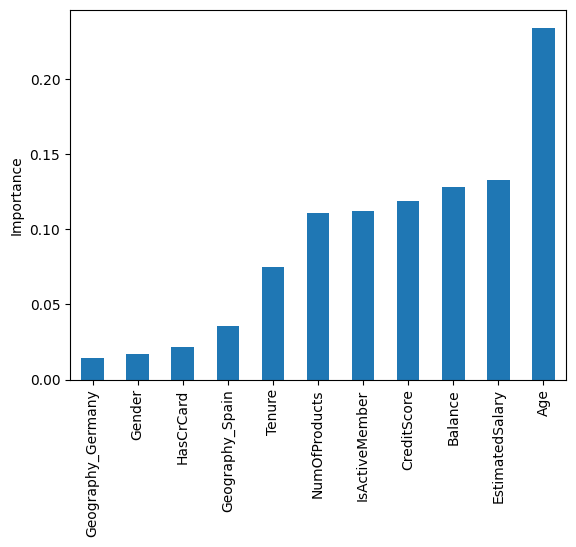

In [75]:
fest.plot(kind="bar")

plt.ylabel("Importance")
plt.show()

In [76]:
import pandas as pd

# Sample data
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Define the function to calculate the difference

In [78]:
def cal_df(rows):
    return (rows["B"] - rows["A"])

df["diff"] = df.apply(cal_df, axis="columns")

In [79]:
df

,A,B,diff
0,1,4,3
1,2,5,3
2,3,6,3


In [80]:
df["add"] = df["A"] + df["B"]

In [81]:
df

,A,B,diff,add
0,1,4,3,5
1,2,5,3,7
2,3,6,3,9


In [82]:
import pandas as pd

In [83]:
df_data = pd.read_csv("/Users/ritkumar17/Desktop/R&D_Project/data_science_interview/data_science_interview/train_v9rqX0R.csv")

In [84]:
df_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
